In [121]:
from google.colab import drive
#drive.mount('/content/dataset.csv')
drive.mount('/content/drive')
#drive.mount('MyDrive/AI-Project/dataset.csv')
#drive.mount('/content/dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data 

In [122]:
#drive.mount('MyDrive/AI-Project/dataset.csv') 

###### importing the required packages and dataset 

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [124]:
df= pd.read_csv('/content/drive/MyDrive/AI-Project/dataset.csv')

In [125]:
#checking for all the missing(NaN) values of columns
df.isna().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

###### checking for imbalances 

In [126]:
100 * df['Type'].value_counts()/len(df) # this shows there is a 88-12 bias towards type 0 which is the benign class 

0    87.871982
1    12.128018
Name: Type, dtype: float64

#### EDA Exploratory Data analysis 

exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.


##### Unique categories under each column 


In [127]:
for i in df.select_dtypes(include='object').columns:
  print(f"{i} -> {df[i].nunique()}")

URL -> 1781
CHARSET -> 9
SERVER -> 239
WHOIS_COUNTRY -> 49
WHOIS_STATEPRO -> 182
WHOIS_REGDATE -> 891
WHOIS_UPDATED_DATE -> 594


###### Charset

In [128]:
#to find the different unique categories of charset 
df['CHARSET'].value_counts()


UTF-8           676
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
None              7
windows-1251      1
ISO-8859          1
windows-1252      1
Name: CHARSET, dtype: int64

In [129]:
#function to keep the top 5 categories of charset
def CHARSET_CLEANER(x):
  if x not in ['UTF-8','ISO-8859-1','utf-8','us-ascii','iso-8859-1']:
    return "OTHERS"
  else:
    return x

In [130]:
df['CHARSET']=df['CHARSET'].apply(CHARSET_CLEANER)


In [131]:
df['CHARSET'].value_counts()

UTF-8         676
ISO-8859-1    427
utf-8         379
us-ascii      155
iso-8859-1    134
OTHERS         10
Name: CHARSET, dtype: int64

###### Server 


In [132]:
df['SERVER'].value_counts()

Apache                                                                             386
nginx                                                                              211
None                                                                               175
Microsoft-HTTPAPI/2.0                                                              113
cloudflare-nginx                                                                    94
                                                                                  ... 
Apache/2.2.29 (Unix) mod_ssl/2.2.29 OpenSSL/1.0.1e-fips DAV/2 mod_bwlimited/1.4      1
gunicorn/19.7.1                                                                      1
Apache/2.2.31 (Unix) mod_ssl/2.2.31 OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4      1
Apache/1.3.37 (Unix) mod_perl/1.29 mod_ssl/2.8.28 OpenSSL/0.9.7e-p1                  1
Apache/2.2.16 (Debian)                                                               1
Name: SERVER, Length: 239, dtype: int64

In [133]:
#function to keep the top 5 categories of server
def SERVER_CLEANER(x):
  if x not in ['Apache','nginx','Microsoft-HTTPAPI/2.0','None','cloudflare-nginx']:
    return "OTHERS"
  else:
    return x

In [134]:
df['SERVER']=df['SERVER'].apply(SERVER_CLEANER)


In [135]:
df['SERVER'].value_counts()

OTHERS                   802
Apache                   386
nginx                    211
None                     175
Microsoft-HTTPAPI/2.0    113
cloudflare-nginx          94
Name: SERVER, dtype: int64

###### WhoIS Statepro

In [136]:
df['WHOIS_STATEPRO'].value_counts()

CA            372
None          362
NY             75
WA             65
Barcelona      62
             ... 
Vic             1
New Jersey      1
Alicante        1
SK              1
Paris           1
Name: WHOIS_STATEPRO, Length: 182, dtype: int64

In [137]:
def STATE_CLEANER(x):
    if x not in ['CA','None','NY','WA','Barcelona','FL']:
        return "OTHERS"
    else:
        return x

In [138]:
#whois_statepro == state/province of admin
df['WHOIS_STATEPRO']=df['WHOIS_STATEPRO'].apply(STATE_CLEANER)

In [139]:
df['WHOIS_STATEPRO'].value_counts()


OTHERS       784
CA           372
None         362
NY            75
WA            65
Barcelona     62
FL            61
Name: WHOIS_STATEPRO, dtype: int64

###### date cleaner 

In [140]:
def DATE_CLEANER(x):
  if x =='None':
    return "Absent"
  else:
    return "Present"

In [141]:
df['WHOIS_REGDATE']=df['WHOIS_REGDATE'].apply(DATE_CLEANER)

In [142]:
df['WHOIS_UPDATED_DATE']=df['WHOIS_UPDATED_DATE'].apply(DATE_CLEANER)

###### dropping url and whois country


In [143]:
df.drop(['URL','WHOIS_COUNTRY'],axis=1,inplace=True)

##### EDA heatmap

to analyse correlation among variables

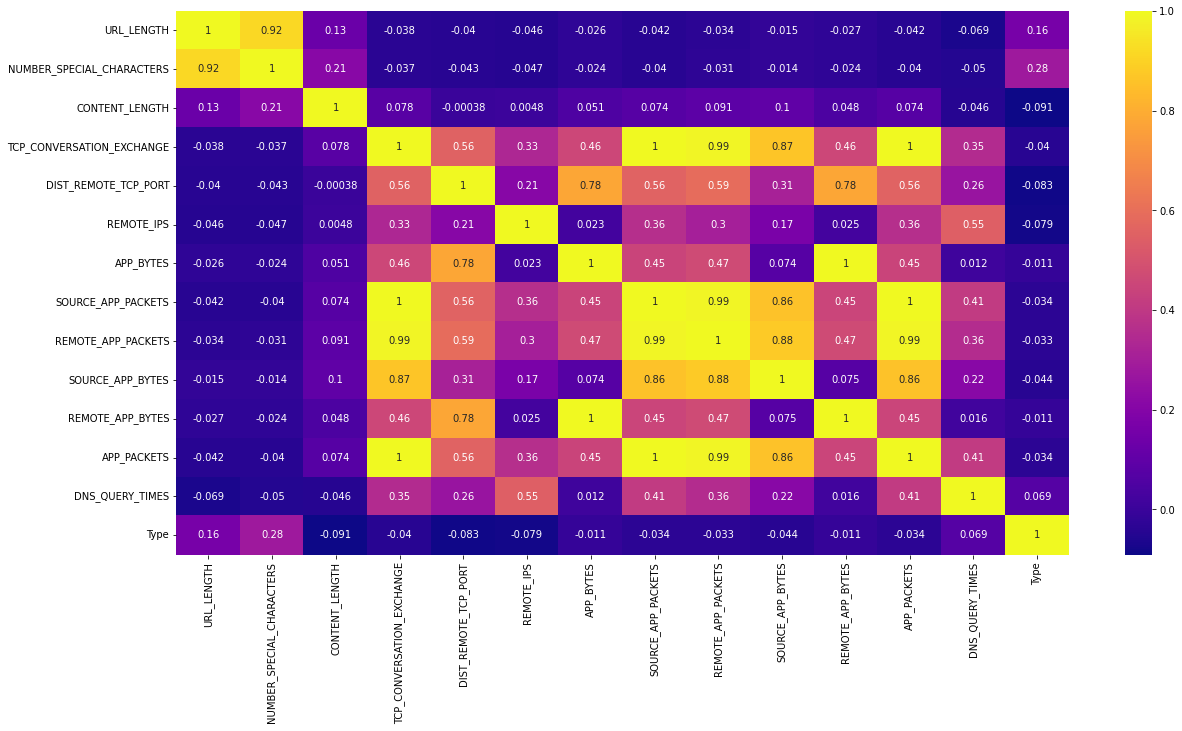

In [144]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(),cmap='plasma',annot=True)

In [145]:
df2=df.copy()

In [146]:
df2.drop(['CONTENT_LENGTH'],axis=1,inplace=True)

In [147]:
df3=df2.copy()

In [148]:
#create dummy variables, which are binary values for the different attributes

df3=pd.get_dummies(df3,columns=['WHOIS_STATEPRO','WHOIS_REGDATE','CHARSET','SERVER','WHOIS_UPDATED_DATE'],drop_first=True)

In [149]:
df3.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,...,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,SERVER_Microsoft-HTTPAPI/2.0,SERVER_None,SERVER_OTHERS,SERVER_cloudflare-nginx,SERVER_nginx,WHOIS_UPDATED_DATE_Present
0,16,7,7,0,2,700,9,10,1153,832,...,0,1,0,0,0,0,0,0,1,0
1,16,6,17,7,4,1230,17,19,1265,1230,...,1,0,0,0,0,0,1,0,0,0
2,16,6,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,17,6,31,22,3,3812,39,37,18784,4380,...,0,0,0,0,0,0,0,0,1,1
4,17,6,57,2,5,4278,61,62,129889,4586,...,1,0,0,0,0,1,0,0,0,1


In [150]:
df3

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,...,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,SERVER_Microsoft-HTTPAPI/2.0,SERVER_None,SERVER_OTHERS,SERVER_cloudflare-nginx,SERVER_nginx,WHOIS_UPDATED_DATE_Present
0,16,7,7,0,2,700,9,10,1153,832,...,0,1,0,0,0,0,0,0,1,0
1,16,6,17,7,4,1230,17,19,1265,1230,...,1,0,0,0,0,0,1,0,0,0
2,16,6,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,17,6,31,22,3,3812,39,37,18784,4380,...,0,0,0,0,0,0,0,0,1,1
4,17,6,57,2,5,4278,61,62,129889,4586,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,0,0,0,0,0,3,186,0,...,1,0,0,0,0,0,0,0,0,1
1777,198,17,0,0,0,0,0,2,124,0,...,1,0,0,0,0,0,0,0,0,1
1778,201,34,83,2,6,6631,87,89,132181,6945,...,0,0,0,1,0,0,1,0,0,1
1779,234,34,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [151]:
df3.isna().sum()

URL_LENGTH                      0
NUMBER_SPECIAL_CHARACTERS       0
TCP_CONVERSATION_EXCHANGE       0
DIST_REMOTE_TCP_PORT            0
REMOTE_IPS                      0
APP_BYTES                       0
SOURCE_APP_PACKETS              0
REMOTE_APP_PACKETS              0
SOURCE_APP_BYTES                0
REMOTE_APP_BYTES                0
APP_PACKETS                     0
DNS_QUERY_TIMES                 1
Type                            0
WHOIS_STATEPRO_CA               0
WHOIS_STATEPRO_FL               0
WHOIS_STATEPRO_NY               0
WHOIS_STATEPRO_None             0
WHOIS_STATEPRO_OTHERS           0
WHOIS_STATEPRO_WA               0
WHOIS_REGDATE_Present           0
CHARSET_OTHERS                  0
CHARSET_UTF-8                   0
CHARSET_iso-8859-1              0
CHARSET_us-ascii                0
CHARSET_utf-8                   0
SERVER_Microsoft-HTTPAPI/2.0    0
SERVER_None                     0
SERVER_OTHERS                   0
SERVER_cloudflare-nginx         0
SERVER_nginx  

In [152]:
#dropping all the missing values
df3.dropna(inplace=True)

##### SMOTE 

###### ABOUT SMOTE : Smote is a resampling technique through which we can balance the minority class which is currently imbalanced. It works using a K- nearest neighbours method. For a given sample in the minority class, it finds the K- nearest neighbours and reconstructs the dataset

In [153]:
from imblearn.over_sampling import SMOTE

In [154]:
X=df3.drop("Type",axis=1)
y=df3['Type']

In [155]:
from imblearn.under_sampling import RandomUnderSampler

In [156]:
undersample = RandomUnderSampler(sampling_strategy=0.5) 

In [157]:
from imblearn.pipeline import Pipeline

In [158]:
oversample = SMOTE(sampling_strategy=0.5) 
steps = [('o',oversample),('u',undersample)]

In [159]:
pipeline = Pipeline(steps=steps)

In [160]:
pipeline

Pipeline(steps=[('o', SMOTE(sampling_strategy=0.5)),
                ('u', RandomUnderSampler(sampling_strategy=0.5))])

In [161]:
X_smote, y_smote=pipeline.fit_resample(X,y)

In [162]:
y_smote.value_counts()

0    1564
1     782
Name: Type, dtype: int64

# Model1 : RandomForest




In [163]:
from sklearn.model_selection import train_test_split


In [164]:
#splitting up the test and train sets 
X_train, X_test, y_train, y_test= train_test_split(X_smote, y_smote, test_size=0.1)

In [165]:
import sklearn.ensemble as ek
from sklearn.linear_model import LogisticRegression

In [166]:
clf1 = ek.RandomForestClassifier(n_estimators=100)

In [167]:
clf1.fit(X_train,y_train)

RandomForestClassifier()

In [168]:
clf1.score(X_test,y_test)

0.9659574468085106

# Model2 : Logistic Regression 






In [169]:
clf2 = LogisticRegression()

In [170]:
clf2.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [171]:
clf2.score(X_test,y_test)

0.7659574468085106

# Model3 : GradientBoosting

In [172]:
clf3 = ek.GradientBoostingClassifier(n_estimators=100)

In [173]:
clf3.fit(X_train,y_train)

GradientBoostingClassifier()

In [174]:
clf3.score(X_test,y_test)

0.9659574468085106

# Model : Neural Network 

In [175]:
#from sklearn.model_selection import train_test_split


In [176]:
#splitting up the test and train sets 
#X_train, X_test, y_train, y_test= train_test_split(X_smote, y_smote, test_size=0.1)

In [177]:
#getting the data in the correct dimension 
X_train_new=np.transpose(X_train)
X_train=X_train_new
X_test_new=np.transpose(X_test)
X_test=X_test_new
y_train_new=y_train.values.reshape(1,2111)
y_train=y_train_new
y_test_new=y_test.values.reshape(1,235)
y_test=y_test_new

In [178]:
#understanding the dataset 
print("The number of training values of X are "+str(X_train.shape))
print("The number of training values of y are "+str(y_train.shape))
print("The number of testing values of X are "+ str(X_test.shape))
print("The number of testing values of y are "+ str(y_test.shape))


The number of training values of X are (30, 2111)
The number of training values of y are (1, 2111)
The number of testing values of X are (30, 235)
The number of testing values of y are (1, 235)


In [179]:
#normalizing the array
#norm=np.linalg.norm(X_train)
#X_train=X_train/norm



###### helper 

In [180]:
layer_dims=[30,16,8,4,1]

In [181]:
def initialize_parameters_deep(layer_dims):
  np.random.seed(3)
  parameters = {}
  L = len(layer_dims)
  #print("length of layer dims is "+str(L))
  for l in range(1 ,L):
    parameters['W'+str(l)]=np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
    parameters['b'+str(l)]=np.zeros((layer_dims[l],1))
    assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l - 1]))
    assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
  return parameters


In [182]:
# defining function to be used 
def sigmoid(Z):
  A=1/(1+np.exp(-Z))
  return A 

def relu(x):
    return x * (x > 0)

In [183]:
# backward function to be used 
def der(Z):
  return np.where(Z <= 0, 0, 1)

def relu_backward(dA, activation_cache):
  arr=der(activation_cache)
  dZ=np.multiply(dA, arr)
  return dZ

def sigmoid_backward(dA, activation_cache):
  arr= np.multiply(sigmoid(activation_cache) , (1-sigmoid(activation_cache) ) )
  dZ=np.multiply(dA,arr)
  return dZ

###### forward prop

In [184]:
#implement the linear part of foward propogation 
def linear_forward(A, W, b):
  Z=np.dot(W,A)+b
  cache=(A,W,b)

  return Z, cache

In [185]:
#linear activation 
def linear_activation_forward(A_prev, W, b, activation):
  if activation=="sigmoid":
    Z,linear_cache=linear_forward(A_prev, W, b)
    A=sigmoid(Z)
    activation_cache=Z
  elif activation =="relu":
    Z, linear_cache=linear_forward(A_prev, W,b)
    A=relu(Z)
    activation_cache=Z
    
  cache=(linear_cache, activation_cache) 
  
  return A, cache


In [186]:
# forward propogation 
def forward_prop(X , parameters):
  caches =[]
  A=X
  L= int(len(parameters)/2)
  #print("value of L is "+str(L))
  for l in range(1,L):
    A_prev=A
    A,cache=linear_activation_forward(A_prev, parameters["W"+str(l)],parameters["b"+str(l)],"relu")
    caches.insert(l,cache)

  AL,cache=linear_activation_forward(A,parameters["W"+str(L)],parameters["b"+str(L)],"sigmoid")
  caches.insert(L,cache)
  return AL, caches 

In [187]:
# cost function
def compute_cost(AL,Y):
  m=Y.shape[1]
  cost=(-1/m)*np.sum( np.multiply(Y,np.log(AL)) + np.multiply((1-Y),np.log(1-AL)) )
  cost = np.squeeze(cost)
  return cost

###### back prop

In [188]:
#linear backward function

def linear_backward(dZ,cache):
  A_prev, W, b = cache
  m = A_prev.shape[1]
  dW=(1/m)*np.dot(dZ,A_prev.T)
  db=(1/m)*np.sum(dZ,axis=1,keepdims=True)
  dA_prev=np.dot(W.T,dZ)

  return dA_prev, dW, db

In [189]:
def linear_activation_backward(dA, cache, activation):
  linear_cache, activation_cache = cache
  if activation == "relu":
    dZ=relu_backward(dA, activation_cache)
    dA_prev,dW,db=linear_backward(dZ,linear_cache)

  elif activation=="sigmoid":
    dZ= sigmoid_backward(dA,activation_cache)
    dA_prev,dW,db=linear_backward(dZ,linear_cache)

  return dA_prev, dW, db

In [190]:
#backward propogation
def back_prop(AL, Y, caches):
  grads = {}
  L = len(caches) # the number of layers
  m = AL.shape[1]
  Y = Y.reshape(AL.shape)
  dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
  current_cache=caches[L-1]
  dA_prev_temp,dW_temp,db_temp=linear_activation_backward(dAL,current_cache, activation="sigmoid")
  grads["dA"+str(L-1)]=dA_prev_temp
  grads["dW"+str(L)]=dW_temp
  grads["db"+str(L)]=db_temp

  for l in reversed(range(L-1)):
    current_cache=caches[l]
    dA_prev_temp,dW_temp,db_temp=linear_activation_backward(grads["dA"+str(l+1)],current_cache,activation="relu")
    grads["dA"+str(l)]=dA_prev_temp
    grads["dW"+str(l+1)]=dW_temp
    grads["db"+str(l+1)]=db_temp
  
  return grads

In [191]:
#update parameters 
def update_parameters(params, grads, learning_rate):
  parameters = params.copy()
  L= int(len(parameters)/2)
  for l in range(L):
    parameters["W"+str(l+1)]=parameters["W"+str(l+1)]-grads["dW"+str(l+1)]*learning_rate
    parameters["b"+str(l+1)]=parameters["b"+str(l+1)]-grads["db"+str(l+1)]*learning_rate
  return parameters

###### model

In [192]:
def model(X,Y, layer_dims,learning_rate=0.0075,num_iter=500,print_cost=True):
  np.random.seed(1)
  costs=[] 
  parameters=initialize_parameters_deep(layer_dims)

  for i in range (0, num_iter):
    AL,caches= forward_prop(X, parameters) #calling forward propogation 
    cost=compute_cost(AL,Y)
    grads=back_prop(AL,Y,caches)
    parameters=update_parameters(parameters,grads,learning_rate)
  
    if print_cost and i % 100 == 0 or i == num_iter - 1:
      print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
    if i % 100 == 0 or i == num_iter:
      costs.append(cost)
  
  return parameters, costs  



#Utility functions

##Predict 

In [193]:
#prediction 
#1 is for malicious websites and 0 is for benign websites
def predict(X, y, parameters):
  L=len(layer_dims)
  res=X
  for i in range(1,L):
    res=np.dot(parameters['W'+str(i)],res)+parameters['b'+str(i)]
  
  res=np.abs(res)
  for i in range(X.shape[1]) :
    if (res[0][i]>0.5):
      res[0][i]=int(0)
    else:
      res[0][i]=int(1)
    
  success=0
  for i in range (X.shape[1]):
    if(res[0][i]==y[0][i]):
      success=success+1
  
  acc=success/X.shape[1]
  return acc
  
  

##Train

In [194]:
parameters, costs= model(X_train, y_train, layer_dims, num_iter=2000, print_cost=True)

Cost after iteration 0: 0.6928691306506666
Cost after iteration 100: 0.6544022911663119
Cost after iteration 200: 0.6486139261612948
Cost after iteration 300: 0.6444151135464506
Cost after iteration 400: 0.6413866935408727
Cost after iteration 500: 0.6392613784446116
Cost after iteration 600: 0.6377778758426097
Cost after iteration 700: 0.6366699951441147
Cost after iteration 800: 0.6357707576808154
Cost after iteration 900: 0.6350122997343137
Cost after iteration 1000: 0.634308944244043
Cost after iteration 1100: 0.6335687721672096
Cost after iteration 1200: 0.6325996733580849
Cost after iteration 1300: 0.6314280407713508
Cost after iteration 1400: 0.6312530492249452
Cost after iteration 1500: 0.6306090842020148
Cost after iteration 1600: 0.6294447832689124
Cost after iteration 1700: 0.6276381980488639
Cost after iteration 1800: 0.6269704501622756
Cost after iteration 1900: 0.6297990864543008
Cost after iteration 1999: 0.6228432071738693


In [195]:
acc_train=predict(X_train, y_train, parameters)
print("The training accuracy is "+str(acc_train))


The training accuracy is 0.6954050213169114


##Test

In [196]:
#parameters_test, costs_test= model(X_test, y_test, layer_dims, num_iter=2000, print_cost=True)

In [197]:
acc_test=predict(X_test, y_test, parameters)
print("the testing accuracy is "+str(acc_test))

the testing accuracy is 0.7063829787234043
